# Introduction to convnets
![title](./pics/intro-pic.png)

In [6]:
# imports
import numpy as np

# keras imports 
from keras import layers
from keras import models
from keras import optimizers
from keras.datasets import mnist
from keras.utils import to_categorical

# visualization imports
import os, shutil
import matplotlib.pyplot as plt

%matplotlib inline

## Instantiating a small convnet

In [7]:
# model architecture developement
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


## Adding a classifier on top of the convnet

In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                36928     
__________

In [9]:
# function to plot model training logs
def plot_model_training_history(history_dict, plot_val=True,chart_type="--o"):
    acc = history_dict['acc']
    loss = history_dict['loss']
    
    if plot_val:
        val_acc = history_dict['val_acc']
        val_loss = history_dict['val_loss']
    epochs = range(1, len(acc) + 1)

    # visualize model training
    epochs = range(1, len(acc) + 1)
    fig, axs = plt.subplots(1, 2,figsize=(15,5))
    axs[0].plot(epochs, loss, chart_type, label='Training loss')
    if plot_val:
        axs[0].plot(epochs, val_loss, chart_type, label='Validation loss')
        axs[0].set_title('training & validation loss')
    else:
        axs[0].set_title('training loss')
                               
    axs[1].plot(epochs, acc, chart_type, label='Training acc')
    if plot_val:
        axs[1].plot(epochs, val_acc, chart_type, label='Validation acc')
        axs[1].set_title('training & validation accuracy')                      
    else:
        axs[1].set_title('training accuracy')                      

    plt.show()
    plt.close()

## Training our convnet on MNIST images

input_train shape: (60000, 28, 28, 1)
input_test shape: (10000, 28, 28, 1) 

visualizing mnist data samples..


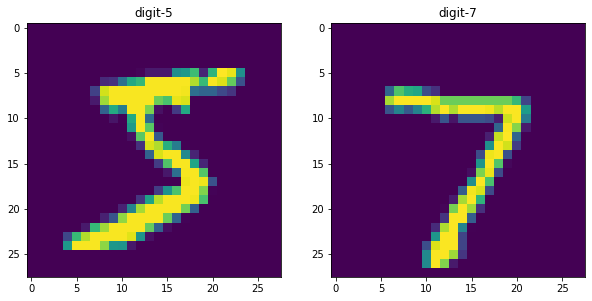


mnist data lables
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Starting model training..

Epoch 1/10
60000/60000 [==============================] - 6s 92us/step - loss: 0.0153 - acc: 0.9955
Epoch 2/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0116 - acc: 0.9966
Epoch 3/10
60000/60000 [==============================] - 5s 90us/step - loss: 0.0087 - acc: 0.9972
Epoch 4/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0081 - acc: 0.9975
Epoch 5/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0079 - acc: 0.9978
Epoch 6/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.0066 - acc: 0.9982
Epoch 7/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.0063 - acc: 0.9984
Epoch 8/10
60000/60000 [==============================] - 5s 87us/step - loss: 0.0048 - acc: 0.9987
Epoch 9/10
60000/60000 [==============================] - 5s 86us/step - loss: 0.0042 

In [11]:
# loading the mnist dataset
(train_images_, train_labels), (test_images_, test_labels) = mnist.load_data()
train_images = train_images_.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images_.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# data understanding
print('input_train shape:', train_images.shape)
print('input_test shape:', test_images.shape, "\n")

print ("visualizing mnist data samples..")
fig, axarr = plt.subplots(1, 2, figsize=(10,5))
axarr[0].set_title('digit-5')
axarr[0].imshow(train_images_[0])
axarr[1].set_title('digit-7')
axarr[1].imshow(test_images_[0])
plt.show()
plt.close()

print ("\nmnist data lables")
print (train_labels[:2])
print ("\nStarting model training..\n")
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=10, batch_size=64)
test_loss, test_acc = model.evaluate(test_images, test_labels)

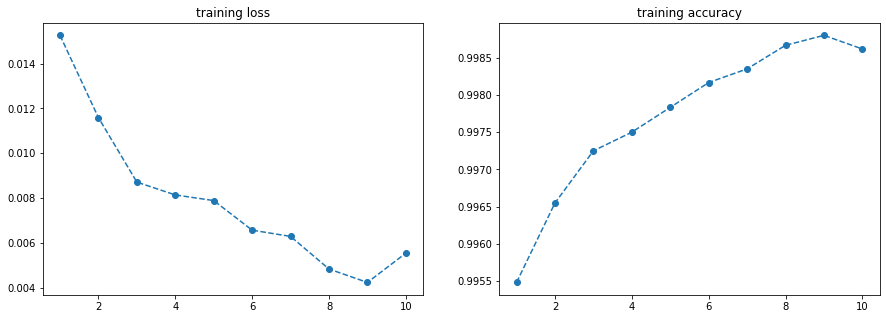

Final accuracy on evaluation data: 99.0%


In [12]:
# visualize model training
plot_model_training_history(history.history,plot_val=False)

print ("Final accuracy on evaluation data: {}%".format(round(test_acc,2)*100))